# Text Classification on Multi-Lingual data using Deep Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2">Prerequisites</a></span></li>
<li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li>
<li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4">Data preparation</a></span></li>
<li><span><a href="#Model-training" data-toc-modified-id="Model-training-5">Model training</a></span></li>
<ul class="toc-item">
<li><span><a href="#Load-model-architecture" data-toc-modified-id="Load-model-architecture-5.1">Load model architecture</a></span></li>
<li><span><a href="#Find-optimum-learning-rate" data-toc-modified-id="Find-optimum-learning-rate-5.2">Find optimum learning rate</a></span></li>    
<li><span><a href="#Validate-results" data-toc-modified-id="Validate-results-5.3">Validate results</a></span></li>
<li><span><a href="#Model-metrics" data-toc-modified-id="Model-metrics-5.4">Model metrics</a></span></li>    
<li><span><a href="#Get-misclassified-records" data-toc-modified-id="Get-misclassified-records-5.5">Get misclassified records</a></span></li>
<li><span><a href="#Saving-the-trained-model" data-toc-modified-id="Saving-the-trained-model-5.6">Saving the trained model</a></span></li>
</ul>
<li><span><a href="#Model-inference" data-toc-modified-id="Model-inference-6">Model inference</a></span></li>
<li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li>
<li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li>
</ul></div>

# Introduction

[Unstructured text](https://en.wikipedia.org/wiki/Unstructured_data) is information that either does not have a pre-defined data model or is not organized in a pre-defined manner. Unstructured information is typically text-heavy, but may contain data such as dates, numbers, and facts as well. This results in irregularities and ambiguities that make it difficult to understand using traditional programs as compared to data stored in fielded form in databases.

**Natural Language Processing (NLP)** techniques can be applied to analyze these unstructured texts/documents. In this sample, we will be looking into one specific techinque of **NLP** called **Text Classification**. 

**Text classification** is the process of assigning tags/labels to an unstructured text. We will be picking up a dataset consisting of house addresses of 10 countries. Our task will be to build/train a classifier to predict a country for an input house address. To make this problem little more interesting, the house addresss in our dataset consists of text in multiple languages like English, Japanese, French, Spanish etc. The dataset is a small subset of the house addresses taken from [OpenAddresses data](http://results.openaddresses.io/) 

In this notebook we will build a classifier using `TextClassifier` class of `arcgis.learn.text` module.

# Prerequisites

- The `TextClassifier` class in `arcgis.learn.text` module is based on [Hugging Face Transformer](https://huggingface.co/transformers/v3.0.2/index.html) library. [This page](https://huggingface.co/transformers/v3.0.2/pretrained_models.html) mentions different trasformer architectures  which comes in different flavours (in terms of model parameters, corpus used to pre-train these architectures etc,). 

- Not every model can be used for `text classification` purpose. As of now, there are around 13 models which can be used to perform `text classification`. These are `BERT`, `RoBERTa`, `DistilBERT`, `ALBERT`, `FlauBERT`, `CamemBERT`, `XLNet`, `XLM`, `XLM-RoBERTa`, `Bart`, `ELECTRA`, `Longformer` and `MobileBERT`

- Data preparation and model training workflows using arcgis.learn have a dependency on [transformers](https://huggingface.co/transformers/v3.0.2/index.html). Refer to the section "Install deep learning dependencies of arcgis.learn module" [on this page](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies-for-arcgis.learn-module) for detailed documentation on installation of the dependencies.

- Labelled data: In order for `TextClassifier` to learn, it needs to see documents/texts that have been assigned a label. Labelled data for this sample notebook is located at data/text-classifier/house-addresses.csv

- To learn more on how `TextClassifier` works, please see the guide on [Text Classification Workflow with arcgis.learn](https://developers.arcgis.com/python/guide/text-classification-workflow).

# Imports

In [1]:
import pandas as pd
from arcgis.learn import prepare_textdata
from arcgis.learn.text import TextClassifier

# Data preparation

Data preparation involves splitting the data into training and validation sets, creating the necessary data structures for loading data into the model and so on. The `prepare_textdata` function can directly read the training samples in one of the above specified formats and automate the entire process. While calling this function, user has to provide the following arguments:
- **path**  &emsp;&emsp;&emsp;- &emsp;&emsp;&emsp;&emsp;       The **full directory path** where the **training file** is present
- **task**   &nbsp;&emsp;&emsp;&emsp;- &emsp;&emsp;&emsp;&emsp;        The **task** for which the **dataset** is being prepared. Available choice at this point is **"classification"**
- **train_file** &nbsp;&ensp;&nbsp;-  &emsp;&emsp;&emsp;&emsp; The file name containing the **training data**. Supported file formats/extensions are **.csv** and **.tsv**
- **text_cols** &nbsp;&nbsp; -  &emsp;&emsp;&emsp;&emsp; The column name in the csv/tsv file that will be used as **feature**.
- **label_cols** &nbsp;-  &emsp;&emsp;&emsp;&emsp; The list of columns denoting the class label to predict. Provide a list of columns in case of multi-label classification problem

Some pre-processing functions are also provided like remoing [HTML tags](https://html.com/tags/) from the text or removing the [URLs](https://en.wikipedia.org/wiki/URL) from the text. User can decide if these pre-processing steps are required for his/her dataset or not.

In [3]:
DATA_ROOT = "/data/TextClassifier/"

In [4]:
data = prepare_textdata(DATA_ROOT, "classification", train_file="house-addresses.csv", 
                        text_cols="Address", label_cols="Country")

The `show_batch()` method can be used to see the training samples, along with labels.

In [6]:
data.show_batch()

Address,Country
"1621, North Zenobia Street",US
"100, BELEURA HILL ROAD, MORNINGTON, VIC, 3931",AU
"SN, ANDADOR PROGRESO, SALINA CRUZ, Salina Cruz, Oaxaca",MX
"306, Rue de Bois-de-Breux, 4020",BE
"20, RUA 7 DE ABRIL, Baianópolis, BA, 47830-000",BR


# Model Training

`TextClassifier` model in `arcgis.laern.text` is built on top of [Hugging Face Transformer](https://huggingface.co/transformers/v3.0.2/index.html) library. The model training and inferencing workflow is similar to computer vision models in `arcgis.learn`. 

To see what transformer backbones are supported for the classification task run the below command

In [7]:
print(TextClassifier.supported_backbones)

['BERT', 'RoBERTa', 'DistilBERT', 'ALBERT', 'FlauBERT', 'CamemBERT', 'XLNet', 'XLM', 'XLM-RoBERTa', 'Bart', 'ELECTRA', 'Longformer', 'MobileBERT']


The HuggingFace Transformer library provides a wide variety of models for each of the backbone listed above. To see the full list kindly visit [this](https://huggingface.co/transformers/pretrained_models.html) link.

The call to `available_backbone_models` method will list out only few of the available models for each backbone. This list is not exhaustive and only contain subset of the models listed in the link above. This function is created to give a general idea to the user about the available models for a given backbone.

In [8]:
print(TextClassifier.available_backbone_models("xlm-roberta"))

('xlm-roberta-base', 'xlm-roberta-large')


## Load model architecture

Invoke the `TextClassifier` class by passing the data and the backbone you have choosen. The dataset consists of addresses in multiple languages like Japanese, English, French, Spanish etc., hence we will use a [multi-lingual transformer backbone](https://huggingface.co/transformers/v3.0.2/multilingual.html) to train our model.

In [ ]:
model = TextClassifier(data, backbone="xlm-roberta-base")

## Find optimum learning rate

In machine learning, the `learning rate`[1] is a **tuning parameter** that determines the step size at each iteration while moving toward a minimum of a loss function, it metaphorically represents the speed at which a machine learning model **"learns"**

- If the learning rate is low, then model training will take a lot of time because steps towards the minimum of the loss function are tiny.

- If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

We have to find an optimum learning rate for the dataset we wish to train our model on. To do so we will call the `lr_find` method of the model.

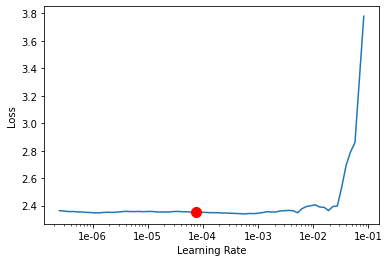

7.585775750291836e-05

In [10]:
model.lr_find()

Training the model is an iterative process. We can train the model using its `fit()` method till the validation loss (or error rate) continues to go down with each training pass also known as epoch. This is indicative of the model learning the task.

In [11]:
model.fit(epochs=2, lr=0.0001)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.751456,1.531471,0.595900,0.404100,01:22
1,1.468745,1.144670,0.743900,0.256100,01:20


The training workflow of text models differs slightly with the computer vision models in `arcgis.learn` in the sense that one has to call the `unfreeze` method of the model and train again to fine tune the entire model for the dataset we wish to train the model on.

In [14]:
model.unfreeze()

model.fit(epochs=4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.063729,0.048894,0.979700,0.020300,05:38
1,0.042092,0.030656,0.985900,0.014100,05:32
2,0.024403,0.026980,0.988000,0.012000,05:38
3,0.020662,0.022759,0.990400,0.009600,05:42


## Validate results

Once we have the trained model, we can see the results to see how it performs.

In [25]:
model.show_results(15)

text,target,prediction
"SN, AVENIDA JOSE MARIA MORELOS Y PAVON OTE., APATZINGÁN DE LA CONSTITUCIÓN, Apatzingán, Michoacán de Ocampo",MX,MX
"906, AVENIDA JOSEFA ORTÍZ DE DOMÍNGUEZ, CIUDAD MENDOZA, Camerino Z. Mendoza, Veracruz de Ignacio de la Llave",MX,MX
"32, CIRCUITO JOSÉ MARÍA URIARTE, FRACCIONAMIENTO RANCHO ALEGRE, Tlajomulco de Zúñiga, Jalisco",MX,MX
"SN, ESTRADA SP 250 SENTIDO GRAMADAO, LADO DIREITO FAZENDA SAO RAFAEL CASA 4, São Miguel Arcanjo, SP, 18230-000",BR,BR
"SN, CALLE JOSEFA ORTÍZ DE DOMÍNGUEZ, RINCÓN DE BUENA VISTA, Omealca, Veracruz de Ignacio de la Llave",MX,MX
"SN, CALLE MICHOACAN, DOLORES HIDALGO CUNA DE LA INDEPENDENCIA NACIONAL, Dolores Hidalgo Cuna de la Independencia Nacional, Guanajuato",MX,MX
"SN, CALLE VERDUZCO, COALCOMÁN DE VÁZQUEZ PALLARES, Coalcomán de Vázquez Pallares, Michoacán de Ocampo",MX,MX
"1712, CALLE MÁRTIRES DEL 7 DE ENERO, CIUDAD MENDOZA, Camerino Z. Mendoza, Veracruz de Ignacio de la Llave",MX,MX
"SN, AVENIDA JACOBO GÁLVEZ, FRACCIONAMIENTO RANCHO ALEGRE, Tlajomulco de Zúñiga, Jalisco",MX,MX
"SN, ANDADOR MZNA 6 AMP. LOS ROBLES, EL PUEBLITO (CRUCERO NACIONAL), Córdoba, Veracruz de Ignacio de la Llave",MX,MX


### Test the model prediction on an input text

In [16]:
text = """1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319"""
print(model.predict(text))

('1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319', 'ES', 0.9999845027923584)


## Model metrics

To get a sense of how well the model is trained, we will calculate some import metrics for out `text-classifier` model. First we will see whats the model accuracy[2] and error rate on the entire data-set. We will call the model's `get_accuracy_and_error_metrics` method.

In [17]:
model.get_accuracy_and_error_metrics()

{'accuracy': 0.9904, 'error_rate': 0.0096}

Other important metrics to look at are Precision, Recall & F-measures [3].

Here is a brief description of them:
- **Precision** -  Precision talks about how precise/accurate your model is. Out of those predicted positive, how many of them are actual positive.  
- **Recall** - Recall is the ability of the classifier to find all the positive samples.
- **F1** - F1 can be interpreted as a weighted harmonic mean of the precision and recall

To learn more about these metrics one can visit the following link - [Precision, Recall & F1 score](https://en.wikipedia.org/wiki/Precision_and_recall)

To find `precision`, `recall` & `f1` scores per label/class we will call the model's `get_precision_recall_score` method.

In [18]:
model.get_precision_recall_score()

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00       929
          BE       1.00      1.00      1.00      1043
          BR       1.00      1.00      1.00       950
          CA       0.94      0.97      0.95       996
          ES       1.00      1.00      1.00       982
          FR       1.00      1.00      1.00      1009
          JP       1.00      1.00      1.00       989
          MX       1.00      1.00      1.00      1024
          US       0.97      0.94      0.95      1070
          ZA       1.00      1.00      1.00      1008

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Get misclassified records

Its always a good idea to see the cases where your model is not performing well. This step will help us to:
- Identify if there is a problem in the dataset.
- Identify if there is a problem with text/documents belonging to a specific label/class.  
- Identify if there is a class imbalance in your dataset, due to which the model didn't see much of the labelled data for a particular class, hance not able to learn properly about that class.

To get the **misclassified records** we will call the model's `get_misclassified_records` method.

In [19]:
misclassified_records = model.get_misclassified_records()

In [20]:
misclassified_records.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
        .set_properties(**{'text-align': "left"}).hide_index()

Address,Target,Prediction
"7206, 7TH AVENUE",CA,US
"40443, CHEAKAMUS WAY",CA,US
"309, SOUTH STREET, BARABOO",US,CA
"6003, ORAM ST",US,CA
"6565, WISCONSIN AVE",US,CA
"394, EILEAN GOWAN ISLAND",CA,US
"916, PINE ST",US,CA
"1862, LITTLE NINTH, SPRINGWATER",CA,US
"316, BEAUMIER LANE",US,CA
"1518, BARCLAY ST",US,CA


## Saving the trained model

Once you are satisfied with the model, you can save it using the save() method. This creates an Esri Model Definition (EMD file) that can be used for inferencing on unseen data.

In [21]:
model.save("country-classifier")

Computing model metrics...


WindowsPath('models/country-classifier')

# Model inference

The trained model can be used to classify new text documents using the predict method. This method accepts a string or a list of strings to predict the labels of these new documents/text.

In [22]:
text_list = data._train_df.sample(15).Address.values
result = model.predict(text_list)

df = pd.DataFrame(result, columns=["Address", "CountryCode", "Confidence"])

df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
        .set_properties(**{'text-align': "left"}).hide_index()

Address,CountryCode,Confidence
"5144, Hummingbird Court, Pueblo, 81008",US,0.999964
"25, HERDSMAN PARADE, UNIT C206, WEMBLEY, WA, 6014",AU,1.000000
"1015, CLINTON ST",CA,0.671130
"1304, ELM GROVE CIR, SILVER SPRING, 20905",US,0.999975
"4, CL P.P. LA CISA, 8338",ES,0.999995
"223, CLARENCE ST",CA,0.734618
"Madibeng NU, Local Municipality of Madibeng",ZA,1.000000
"4, FRANKLIN STREET, WEST HOBART, TAS, 7000",AU,1.000000
"428, WALKER DR, AG. CENTER FD, Gaston",US,0.999911
"Null, Mtshayazafe, Ngquza Hill",ZA,1.000000


# Conclusion

In this notebook we will build a classifier using `TextClassifier` class of `arcgis.learn.text` module. The dataset consisted of house addresses of 10 countries written in languages like English, Japanese, French, Spanish etc. To achieve this we used a [multi-lingual transformer backbone](https://huggingface.co/transformers/v3.0.2/multilingual.html) to build a classifier to predict the country for an input house address. 

# References

[1] [Learning Rate](https://en.wikipedia.org/wiki/Learning_rate)

[2] [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision)

[3] [Precision, recall and F-measures](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)